a)


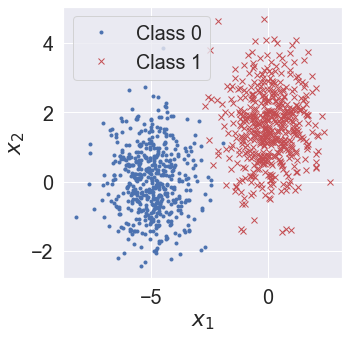

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.datasets import make_blobs
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

# make 3-class dataset for classification
N = 1000
centers = [[-5, 0], [0, 1.5]]
x, y = make_blobs(n_samples=N, centers=centers, random_state=42)

print('a)')
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(x[idx0,0], x[idx0,1], '.', label='Class 0')
plt.plot(x[idx1,0], x[idx1,1], 'rx', label='Class 1')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

In [47]:
print('b)')
x1 = x[:,0] + 0.1*np.random.randn(N,)
x2 = x[:,1] + 0.1*np.random.randn(N,)
x0 = np.ones((N,))
X = np.c_[x0,x1,x2]

# Instantiate and train perceptron.
per = Perceptron(random_state=42)
per.fit(X, y)

# Predict.
y_pred = per.predict(X)

# Calculate and return the accuracy on the test data
accuracy = accuracy_score(y, y_pred)
print('accuracy: ',accuracy)

b)
accuracy:  0.99


c)


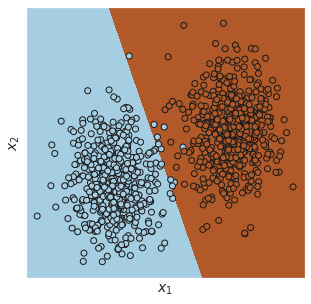

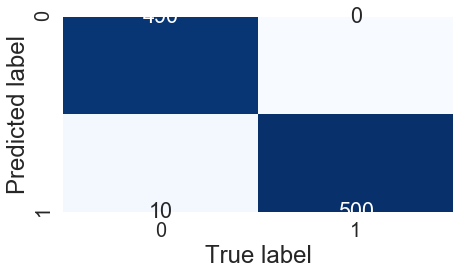

In [48]:
print('c)')
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x1.min() - .5, x1.max() + .5
y_min, y_max = x2.min() - .5, x2.max() + .5
h = .002  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = per.predict(np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x1, x2, c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

# Evaluate the model's performance with the confusion matrix between the true and predicted labels for the test data.
fig = plt.figure(figsize=(7,7))
mat = confusion_matrix(y, y_pred)
sns.set(font_scale=1.8)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('True label', fontsize=24)
plt.ylabel('Predicted label', fontsize=24)
plt.show()

In [49]:
print('d')
per = LogisticRegression(solver='lbfgs', random_state=42)
per.fit(x, y)
# Predict.
y_pred = per.predict(x)

# Calculate and return the accuracy on the test data
accuracy = accuracy_score(y, y_pred)
print('accuracy: ',accuracy)

d
accuracy:  0.998


e)


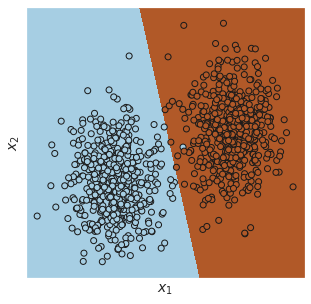

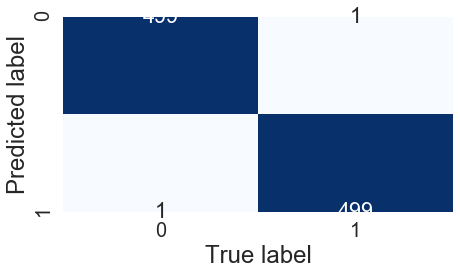

In [50]:
print('e)')
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x1.min() - .5, x1.max() + .5
y_min, y_max = x2.min() - .5, x2.max() + .5
h = .002  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = per.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x1, x2, c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

# Evaluate the model's performance with the confusion matrix between the true and predicted labels for the test data.
fig = plt.figure(figsize=(7,7))
mat = confusion_matrix(y, y_pred)
sns.set(font_scale=1.8)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('True label', fontsize=24)
plt.ylabel('Predicted label', fontsize=24)
plt.show()

In [51]:
print('f) O classificador Logistic Regression apresenta melhor performance, pois os perceptrons não produzem como saída uma probabilidade de classe, em vez disso, eles apenas fazem previsões com base em um limiar rígido, i.e., 0 ou 1. Isso faz com que o preceptron não seja diferenciavel e portanto não possa ser aplicado para um modelo como o gradiente descendente.')

f) O classificador Logistic Regression apresenta melhor performance, pois os perceptrons não produzem como saída uma probabilidade de classe, em vez disso, eles apenas fazem previsões com base em um limiar rígido, i.e., 0 ou 1. Isso faz com que o preceptron não seja diferenciavel e portanto não possa ser aplicado para um modelo como o gradiente descendente.
